
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [1]:
## library imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [3]:
ha.value_counts('cp')

cp
0    128
2     81
1     44
3     20
Name: count, dtype: int64

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


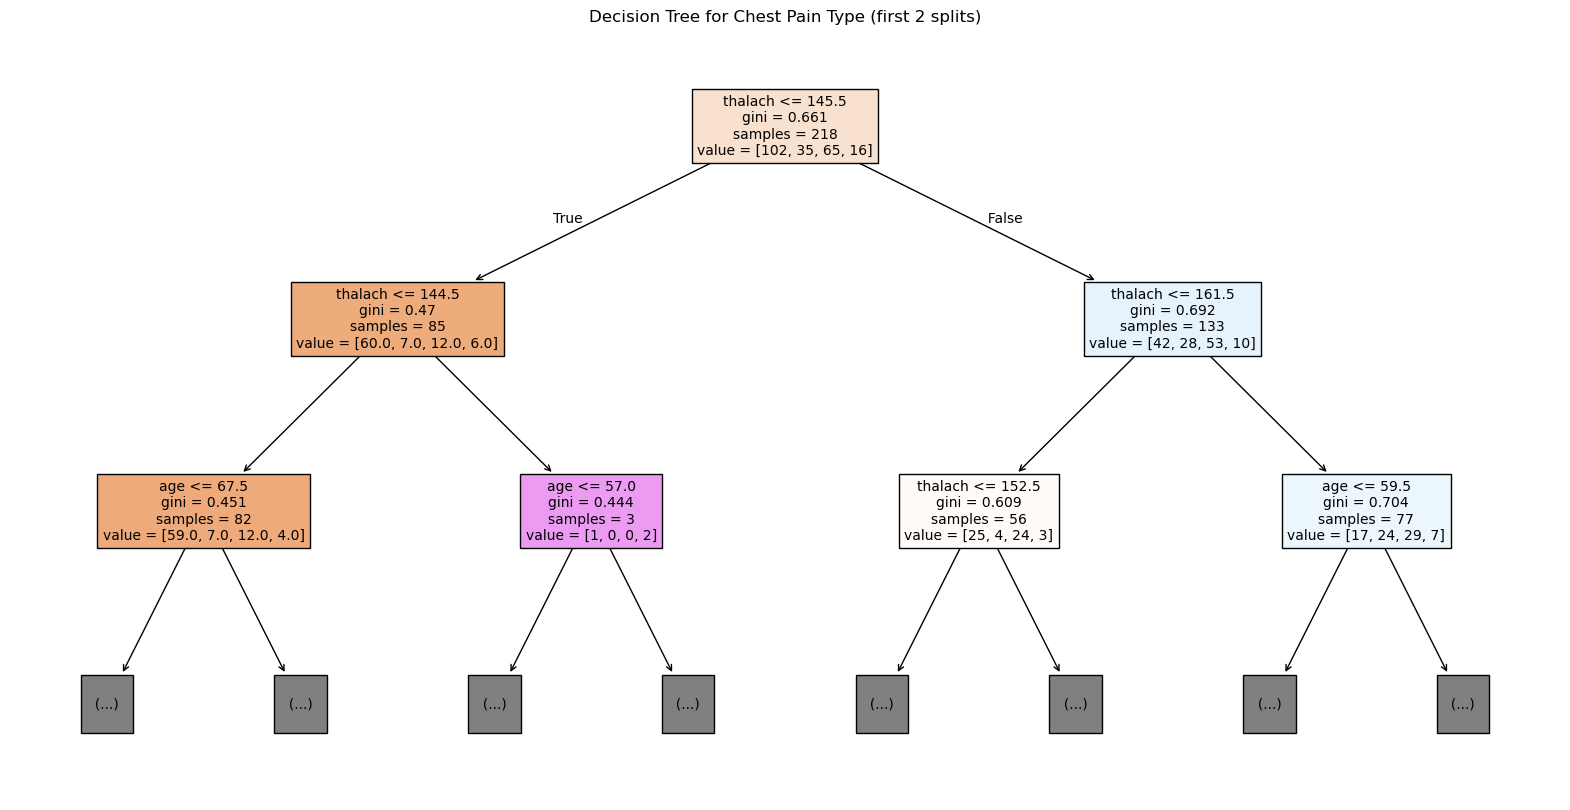

In [4]:
X1 = ha.drop(columns=['cp', 'output'])
y1 = ha['cp']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
lda = LinearDiscriminantAnalysis()

knn.fit(X1_train, y1_train)
dt.fit(X1_train, y1_train)
lda.fit(X1_train, y1_train)

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X1.columns.tolist(), max_depth=2, fontsize=10)
plt.title("Decision Tree for Chest Pain Type (first 2 splits)")
plt.show()

The decision tree indicates that maximum heart rate achieved during exercise (thalach) is the most important factor for predicting heart-attack risk. The root split shows that patients with lower maximum heart rates (below about 145 bpm) are much more likely to be at risk, reflecting limited cardiovascular capacity under stress. Among those with lower thalach, older age further increases risk, while higher maximum heart rate and younger age point to lower risk. In short, the tree suggests that reduced exercise heart-rate performance, especially in older patients, is a strong warning sign of heart-attack risk, whereas younger, fitter individuals who reach higher heart rates are generally classified as low risk.

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [5]:
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3
0,63,1,3,145,233,0,150,1,1
1,37,1,2,130,250,1,187,1,0
2,56,1,1,120,236,1,178,1,0
3,57,0,0,120,354,1,163,1,0
4,57,1,0,140,192,1,148,1,0


In [6]:
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2
0,63,1,3,145,233,0,150,1,1,0
1,37,1,2,130,250,1,187,1,0,1
2,56,1,1,120,236,1,178,1,0,0
3,57,0,0,120,354,1,163,1,0,0
4,57,1,0,140,192,1,148,1,0,0


In [7]:
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1
0,63,1,3,145,233,0,150,1,1,0,0
1,37,1,2,130,250,1,187,1,0,1,0
2,56,1,1,120,236,1,178,1,0,0,1
3,57,0,0,120,354,1,163,1,0,0,0
4,57,1,0,140,192,1,148,1,0,0,0


In [8]:
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1


In [9]:
cols_to_exclude_from_features = ['cp', 'output'] + [col for col in ha.columns if col.startswith('cp_is_')]

# cp = 3
X2 = ha.drop(columns=cols_to_exclude_from_features)
y2 = ha['cp_is_3']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X2_train, y2_train)

LogisticRegression(max_iter=1000)

In [10]:
f1_score(y2_test, logreg1.predict(X2_test))

0.0

In [11]:
# cp = 2
X3 = ha.drop(columns=cols_to_exclude_from_features)
y3 = ha['cp_is_2']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X3_train, y3_train)

LogisticRegression(max_iter=1000)

In [12]:
f1_score(y3_test, logreg2.predict(X3_test))

0.0

In [13]:
# cp = 1
X4 = ha.drop(columns=cols_to_exclude_from_features)
y4 = ha['cp_is_1']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)

logreg3 = LogisticRegression(max_iter=1000)
logreg3.fit(X4_train, y4_train)

LogisticRegression(max_iter=1000)

In [14]:
f1_score(y4_test, logreg3.predict(X4_test))

0.0

In [15]:
# cp = 0
X5 = ha.drop(columns=cols_to_exclude_from_features)
y5 = ha['cp_is_0']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

logreg4 = LogisticRegression(max_iter=1000)
logreg4.fit(X5_train, y5_train)

LogisticRegression(max_iter=1000)

In [16]:
f1_score(y5_test, logreg4.predict(X5_test))

0.6274509803921569

CP=0 was the best in distinguishing the results, with the highest f1-score. This is probably attributed to the fact that the cp column in extremely imbalanced, with a majority being 0.

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [17]:
# 0 to 1

ha_01 = ha[ha['cp'].isin([0, 1])].copy()

X_01 = ha_01.drop(columns=['cp', 'output'] + [col for col in ha_01.columns if col.startswith('cp_is_')])
y_01 = ha_01['cp']

X_01_train, X_01_test, y_01_train, y_01_test = train_test_split(X_01, y_01, test_size=0.2, random_state=42, stratify=y_01)

logreg_01 = LogisticRegression(max_iter=1000)
logreg_01.fit(X_01_train, y_01_train)

y_pred_proba_01 = logreg_01.predict_proba(X_01_test)[:, 1]

roc_auc_01 = roc_auc_score(y_01_test, y_pred_proba_01)
print(f"ROC-AUC for cp_0 vs cp_1: {roc_auc_01:.4f}")

ROC-AUC for cp_0 vs cp_1: 0.6496


In [18]:
# 0 to 2

ha_02 = ha[ha['cp'].isin([0, 2])].copy()

X_02 = ha_02.drop(columns=['cp', 'output'] + [col for col in ha_02.columns if col.startswith('cp_is_')])
y_02 = ha_02['cp']

X_02_train, X_02_test, y_02_train, y_02_test = train_test_split(X_02, y_02, test_size=0.2, random_state=42, stratify=y_02)

logreg_02 = LogisticRegression(max_iter=1000)
logreg_02.fit(X_02_train, y_02_train)

y_pred_proba_02 = logreg_02.predict_proba(X_02_test)[:, 1]

roc_auc_02 = roc_auc_score(y_02_test, y_pred_proba_02)
print(f"ROC-AUC for cp_0 vs cp_2: {roc_auc_02:.4f}")

ROC-AUC for cp_0 vs cp_2: 0.8438


In [19]:
# 0 to 3
ha_03 = ha[ha['cp'].isin([0, 3])].copy()

X_03 = ha_03.drop(columns=['cp', 'output'] + [col for col in ha_03.columns if col.startswith('cp_is_')])
y_03 = ha_03['cp']

X_03_train, X_03_test, y_03_train, y_03_test = train_test_split(X_03, y_03, test_size=0.2, random_state=42, stratify=y_03)

logreg_03 = LogisticRegression(max_iter=1000)
logreg_03.fit(X_03_train, y_03_train)

y_pred_proba_03 = logreg_03.predict_proba(X_03_test)[:, 1]

roc_auc_03 = roc_auc_score(y_03_test, y_pred_proba_03)
print(f"ROC-AUC for cp_0 vs cp_3: {roc_auc_03:.4f}")

ROC-AUC for cp_0 vs cp_3: 0.5769


the 0-2 model had the highest AUC score, therefore the best model for comparing those two cp values.